## Naive Bayes

### Import Packages 

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
    

## Load Data 


In [12]:
#Load Dataset
dataset_path = '../data/updated_dataset_with_3_clusters.csv'
dataset = pd.read_csv(dataset_path)

#Preview
print("Dataset Preview:")
print(dataset.head())
print("\nDataset Information:")
dataset.info()


Dataset Preview:
   age  sex  chest_pain_type  resting_bp  max_heart_rate  exercise_angina  \
0   40    1                2         140             172                0   
1   49    0                3         160             156                0   
2   37    1                2         130              98                0   
3   48    0                4         138             108                1   
4   54    1                3         150             122                0   

   oldpeak  ST_slope  MI  cluster  
0      0.0         1   0        1  
1      1.0         2   1        1  
2      0.0         1   0        1  
3      1.5         2   1        0  
4      0.0         1   0        2  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              888 non-null    int64  
 1   sex              888 non-null    i

## Preprocessing of data 

In [13]:
# features and target
X = dataset.drop(columns=["cluster"])
y = dataset["cluster"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize of  features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
#  SMOTE to balancing of dataset 
    # PCA
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Train Nave bayes 

In [15]:


nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)

# Predictions
y_pred = nb_model.predict(X_test_pca)
y_prob = nb_model.predict_proba(X_test_pca)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

    

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.94      0.92      0.93        83
           2       0.86      0.91      0.89        70

    accuracy                           0.93       267
   macro avg       0.92      0.92      0.92       267
weighted avg       0.93      0.93      0.93       267



## Confusion Metrics 

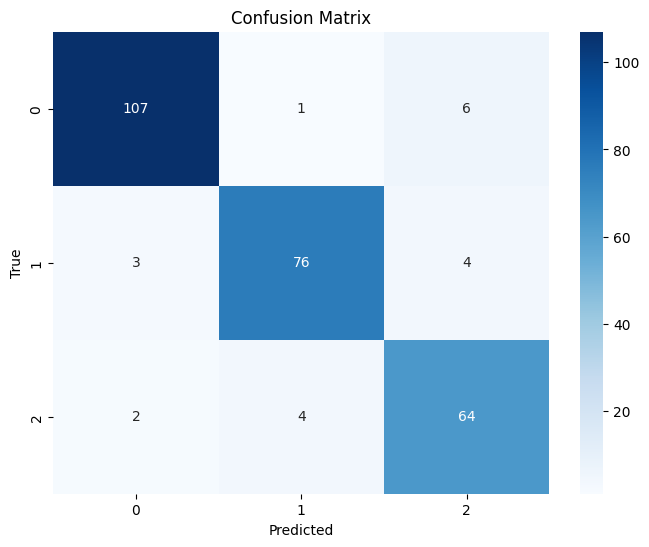

In [16]:

cm = confusion_matrix(y_test, y_pred)  
class_labels = sorted(y.unique())  

# confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

    

# Roc curve 

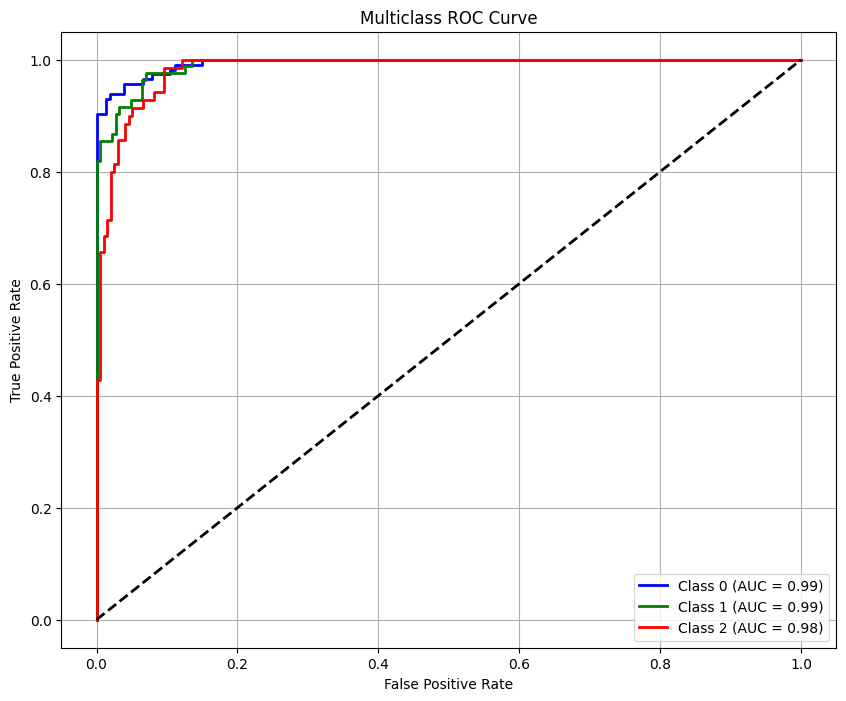

In [17]:
# Binarize target for ROC
y_test_bin = label_binarize(y_test, classes=class_labels)
n_classes = y_test_bin.shape[1]

# Calculation of  ROC curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Distribution

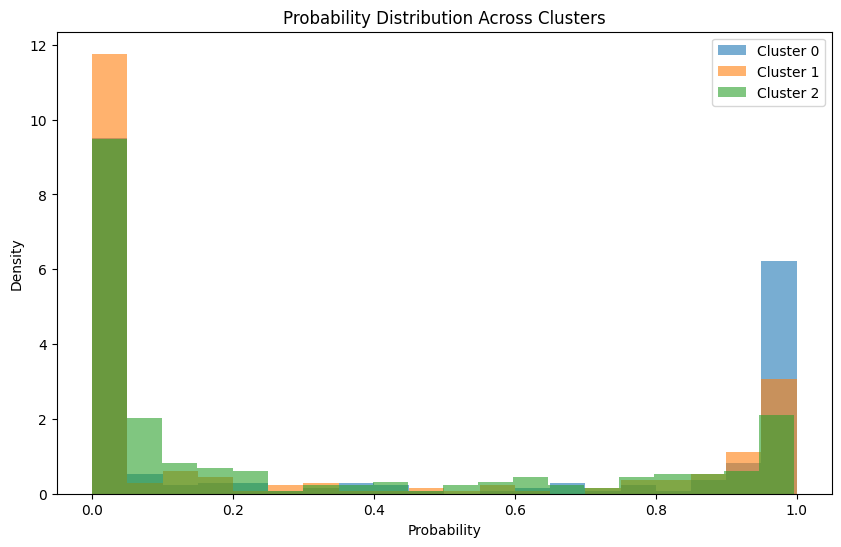

In [18]:
# Visualize probability distributions
plt.figure(figsize=(10, 6))
for cluster in range(y_prob.shape[1]):
    plt.hist(y_prob[:, cluster], bins=20, alpha=0.6, label=f"Cluster {cluster}", density=True)
plt.title("Probability Distribution Across Clusters")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend()
plt.show()
